In [47]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import glob
import os
import tables as tb

from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as m3d
import math
from matplotlib import image
import matplotlib.pyplot as plt

import seaborn as sns
import sys
import pickle
import time
import re

In [48]:
import scipy
from scipy import interpolate
from scipy.interpolate import InterpolatedUnivariateSpline

In [49]:
datfiles='/Users/rogerslc/MuonData/reconstructedAngularDistrMuonFlux-mss-LAB2400-finalNumbers.csv'

In [50]:
MuonMeas = pd.read_csv(datfiles, delimiter=',',header=None).values
muon_data=pd.DataFrame(data=MuonMeas, columns=["gamma", "alpha","flux"])
muon_data=muon_data[muon_data.alpha<80]


cols = [ 'alpha', 'gamma','flux']
muon_data = muon_data[cols]


for Gs in muon_data.gamma.unique():
    avg=muon_data[(muon_data.alpha<=4) & (muon_data.alpha>=1) & (muon_data.gamma==Gs)].flux.mean()
    muon_data['flux'].loc[(muon_data.gamma==Gs) & (muon_data.alpha<=4)]=avg

muon_data['gamma']=muon_data['gamma'].map(lambda gamma: (gamma)%360*np.pi/180)    
#muon_data['gamma']=muon_data['gamma'].map(lambda gamma: np.radians(gamma))

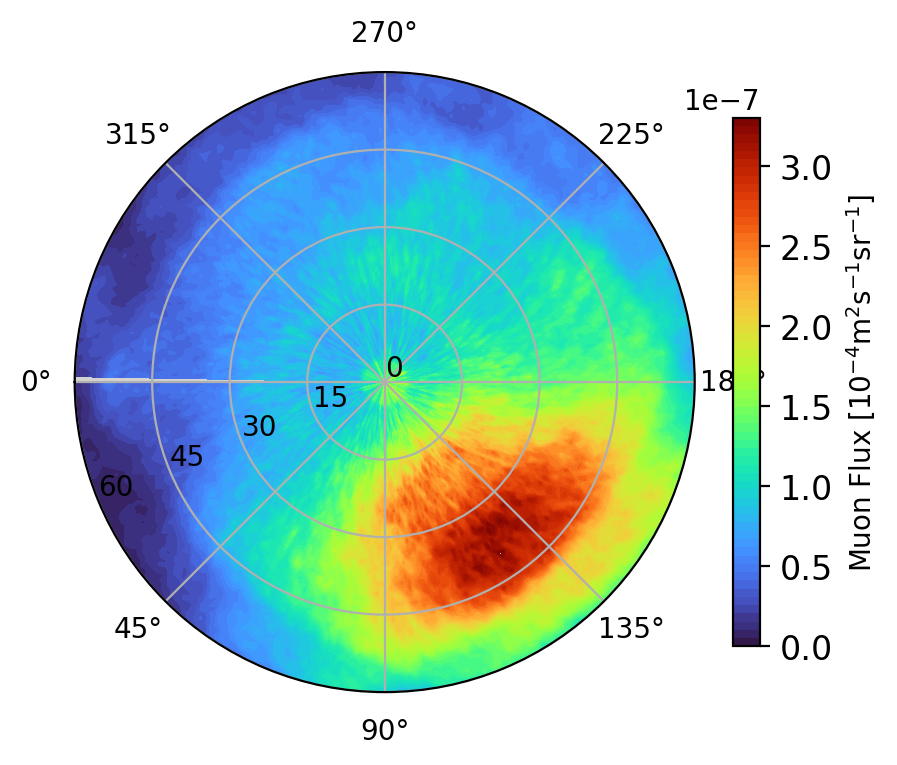

In [53]:
rmu, alphamu = np.meshgrid(muon_data.alpha.unique(), muon_data.gamma.unique())

valuesmu=np.array(muon_data.flux/10**4)
valuesmu = valuesmu.reshape(len(muon_data.gamma.unique()), len(muon_data.alpha.unique()))
 
#to put north on top

fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),figsize=(5,5),dpi=200)
fig.patch.set_facecolor('white')
levels=np.linspace(0,3.3e-7,65)


im=ax.contourf(alphamu, rmu, valuesmu,levels=levels, cmap=plt.cm.turbo)




ax.set_theta_zero_location("W")
ax.set_theta_direction(1)
ax.set_rticks([0,15,30,45,60])
ax.set_rlim(0,60)

cb=fig.colorbar(im, shrink=0.7,ticks=np.arange(0,3.5e-7,5e-8))
#ax.set_thetagrids([0,90,180,270],['N','E','S','W'])
ax.set(facecolor = "lightgrey",alpha=0.2)
cb.set_label("Muon Flux [10$^{-4}$m$^{2}$s$^{-1}$sr$^{-1}$]")
cb.ax.tick_params(labelsize=12)
plt.show()



#cax=ax.contourf(thetamu, rmu, valuesmu,60, cmap=plt.cm.nipy_spectral)

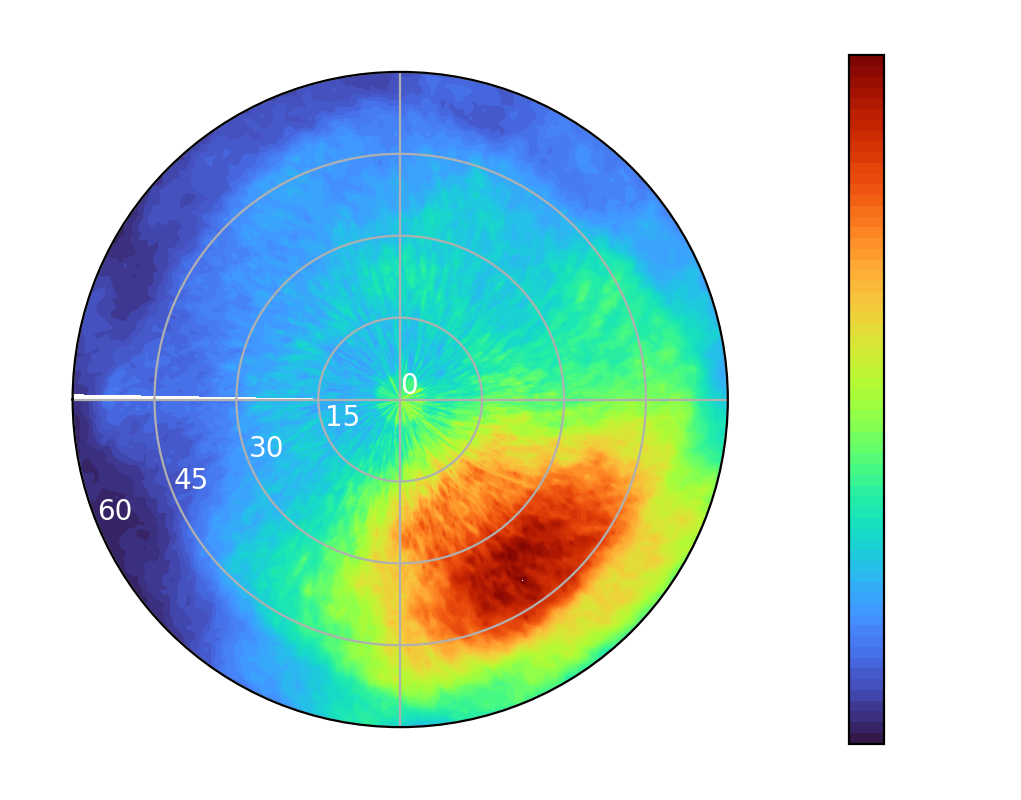

In [9]:
rmu, thetamu = np.meshgrid(muon_data.theta.unique(), muon_data.phi.unique())

valuesmu=np.array(muon_data.flux/10**4)
valuesmu = valuesmu.reshape(len(muon_data.phi.unique()), len(muon_data.theta.unique()))
levels=np.linspace(0,3.3e-7,65)
fig, ax = plt.subplots(subplot_kw=dict(projection='polar'),constrained_layout=True,figsize=(5,5),dpi=200)




#to put north on top
ax.set_theta_zero_location("W")

ax.set_theta_direction(1)
ax.set_rlim(0,60)
ax.set_rticks([0,15,30,45,60])
ax.tick_params(axis='both', colors='White')

cax=ax.contourf(thetamu, rmu, valuesmu,levels=levels, cmap=plt.cm.turbo)
cb =plt.colorbar(cax, shrink=0.7,ticks=np.arange(0,3.5e-7,5e-8))

cb.set_label("Muon Flux [10$^{-4}$m$^{2}$s$^{-1}$sr$^{-1}$]",color="white")
cb.ax.tick_params(labelsize=12,color='White', labelcolor='white')
ax.set_thetagrids([0,90,180,270],['W','S','E','N'])

#plt.savefig("/Users/rogerslc/Documents/MuFluxPred/PolarMeasuredFluxes.png",dpi=250,bbox_inches='tight')


plt.show()

In [54]:
rmu, alphamu = np.meshgrid(muon_data.alpha.unique(), muon_data.gamma.unique())

valuesmu=np.array(muon_data.flux/10**4)
valuesmu = valuesmu.reshape(len(muon_data.gamma.unique()), len(muon_data.alpha.unique()))

MeasFlux=scipy.interpolate.RectBivariateSpline(muon_data.gamma.unique(),(np.deg2rad(muon_data.alpha.unique())),np.fliplr(valuesmu),s=0,kx=3, ky=3)

with open('/Users/rogerslc/Documents/MuFluxPred/MeasuredPolarFluxInterpolator_MeasAntiFromWest.pkl', 'wb') as f:
        pickle.dump(MeasFlux, f)

In [133]:
MeasFlux(np.deg2rad(135),np.deg2rad(45))

array([[3.08042e-07]])

In [36]:
from scipy.interpolate import interp2d, NearestNDInterpolator,LinearNDInterpolator

In [102]:
MuonMeas = pd.read_csv(datfiles, delimiter=',',header=None).values
muon_data=pd.DataFrame(data=MuonMeas, columns=["gamma", "alpha","flux"])
muon_data=muon_data[muon_data.alpha<80]

cols = [ 'alpha', 'gamma','flux']
muon_data = muon_data[cols]


for Gs in muon_data.gamma.unique():
    avg=muon_data[(muon_data.alpha<=4) & (muon_data.alpha>=1) & (muon_data.gamma==Gs)].flux.mean()
    muon_data['flux'].loc[(muon_data.gamma==Gs) & (muon_data.alpha<=4)]=avg

#muon_data['gamma']=muon_data['gamma'].map(lambda gamma: (gamma+180)%360*np.pi/180)    
#muon_data['gamma']=muon_data['gamma'].map(lambda gamma: np.radians(gamma))

In [32]:
muon_data2=muon_data
#muon_data2['gamma']=muon_data['gamma'].map(lambda gamma: (np.rad2deg(gamma)+180)%360*np.pi/180)
#muon_data2=muon_data.sort_values(by=['gamma', 'alpha'])


valuesmu=np.array(muon_data2.flux/10**4)
#valuesmu = valuesmu.reshape(len(muon_data2.gamma.unique()), len(muon_data2.alpha.unique()))

In [33]:
np.max(Zs)

NameError: name 'Zs' is not defined

In [123]:
print(np.min(Ys),np.max(Ys),np.min(Xs),np.max(Xs))

0.0 1.3788101090755203 3.0144353347599235e-05 6.265512601790057


In [34]:
Xs=list(muon_data2.gamma)
Ys=list(np.deg2rad(muon_data2.alpha))
Zs=list(muon_data2.flux/10**4)


In [37]:
MeasFlux2=LinearNDInterpolator(np.array([Xs,Ys]).transpose(),Zs)

In [38]:
MeasFlux2((np.deg2rad(270+30)),np.deg2rad(35))

array(6.41308e-08)

In [130]:
MeasFlux2(5,1.2)

array(2.93081777e-09)

In [39]:
np.max(Zs)

3.3613699999999996e-07

In [40]:
#Put it into normal flux convention
def MeasPolarFlux(alpha,gamma):
    gamnew=((180+gamma)%360)*np.pi/180
    alphnew=alpha
    F=MeasFlux2(gamnew,alphnew )
    return F

In [46]:
MeasPolarFlux(np.deg2rad(45),np.deg2rad(90))

array(1.44379439e-07)